### CROP YIELD PREDICTION USING LINEAR REGRESSION

##### Importing the Required modules and libraries

In [281]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

##### Reading and Analysing the data

In [298]:
data = pd.read_csv('./dataset.csv')
data

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"
...,...,...,...,...,...,...,...,...,...
995,614,6.379,94.132,11.571,5,98.673,2.891,6,"c,b"
996,490,6.980,82.727,11.264,5,101.090,3.500,6,"d,c,b"
997,392,NaN,58.218,11.859,4,103.673,4.005,6,"c,b,a"
998,773,10.070,67.905,11.567,4,104.343,2.339,6,a


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   water             958 non-null    float64
 2   uv                949 non-null    float64
 3   area              1000 non-null   float64
 4   fertilizer_usage  1000 non-null   int64  
 5   yield             1000 non-null   float64
 6   pesticides        1000 non-null   float64
 7   region            1000 non-null   int64  
 8   categories        1000 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB


In [300]:
data.drop('id', inplace=True, axis=1)
data.drop('categories', inplace=True, axis=1)

In [301]:
data.head()

,water,uv,area,fertilizer_usage,yield,pesticides,region
0,5.615,65.281,3.230,0,7.977,8.969,0
1,7.044,73.319,9.081,0,23.009,7.197,0
2,5.607,60.038,2.864,2,23.019,7.424,0
3,9.346,64.719,2.797,2,28.066,1.256,0
4,7.969,NaN,5.407,1,29.140,0.274,0


In [302]:
data.fillna(0, inplace = True)

In [303]:
data['uv']

0      65.281
1      73.319
2      60.038
3      64.719
4       0.000
        ...  
995    94.132
996    82.727
997    58.218
998    67.905
999     0.000
Name: uv, Length: 1000, dtype: float64

In [304]:
data['water']

0       5.615
1       7.044
2       5.607
3       9.346
4       7.969
        ...  
995     6.379
996     6.980
997     0.000
998    10.070
999     7.679
Name: water, Length: 1000, dtype: float64

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   water             1000 non-null   float64
 1   uv                1000 non-null   float64
 2   area              1000 non-null   float64
 3   fertilizer_usage  1000 non-null   int64  
 4   yield             1000 non-null   float64
 5   pesticides        1000 non-null   float64
 6   region            1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [306]:
data.describe()

,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,11.710157,70.185656,8.098848,2.12300,58.758571,3.452301,3.039000
std,168.691836,18.922905,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.000000,0.000000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,4.262000,65.744500,6.297000,1.00000,40.698000,1.804500,2.000000
50%,6.348000,72.868000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,8.611000,80.220250,9.900250,3.00000,73.645500,4.916000,5.000000
max,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


In [307]:
data.shape

(1000, 7)

In [308]:
data.columns

Index(['water', 'uv', 'area', 'fertilizer_usage', 'yield', 'pesticides',
       'region'],
      dtype='object')

##### Visualising the data

<AxesSubplot:xlabel='yield', ylabel='Count'>

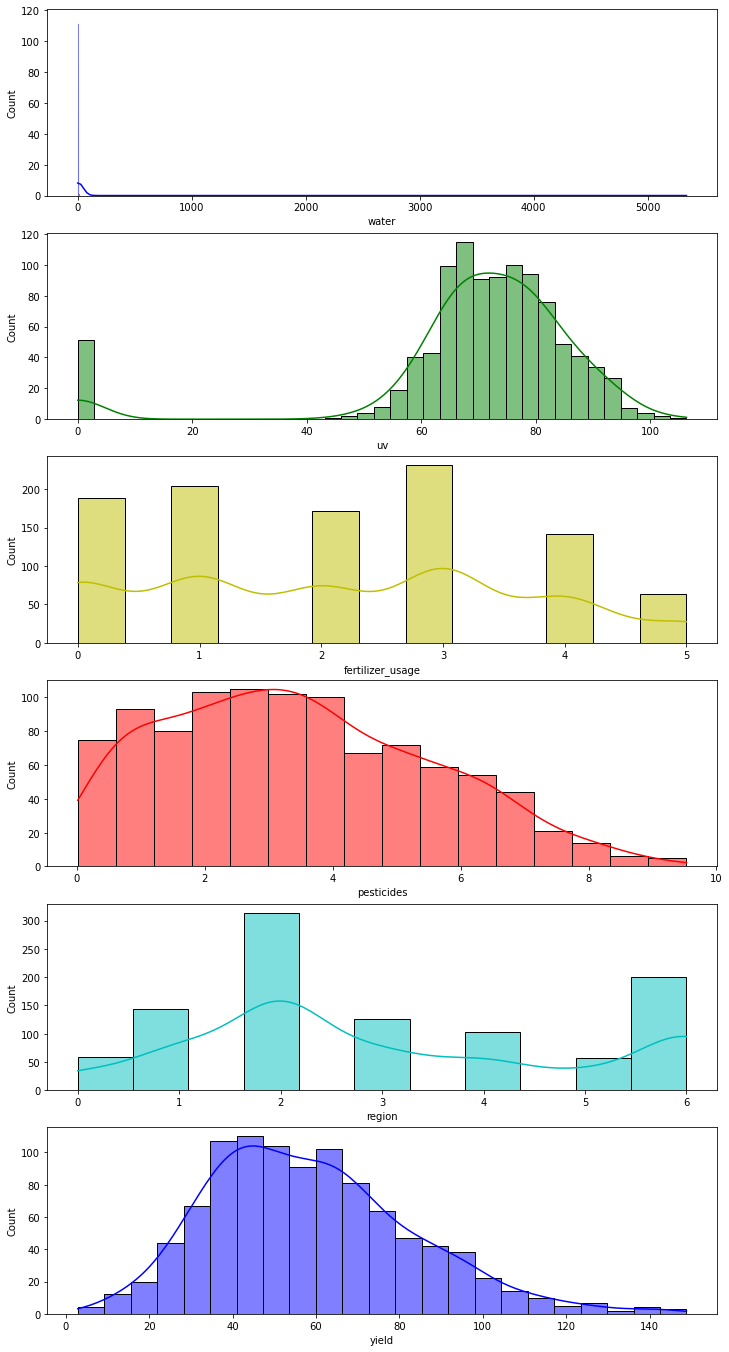

In [309]:
f, ax = plt.subplots(6, figsize=(12,24))
sns.histplot(data.water,color='b',ax=ax[0], kde=True)
sns.histplot(data.uv,color='g',ax=ax[1], kde=True)
sns.histplot(data.fertilizer_usage,color='y',ax=ax[2], kde=True)
sns.histplot(data.pesticides,color='r',ax=ax[3], kde=True)
sns.histplot(data.region,color='c',ax=ax[4], kde=True)
sns.histplot(data['yield'],color='b',ax=ax[5], kde=True)

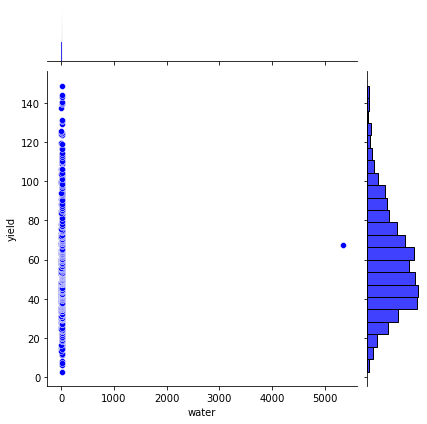

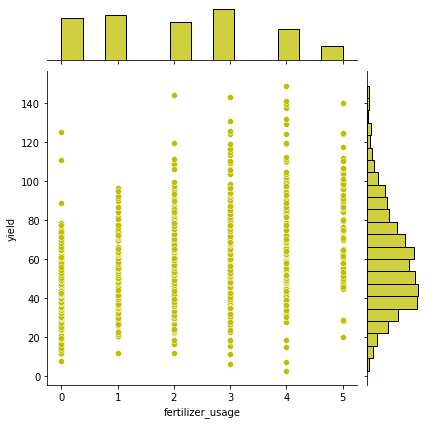

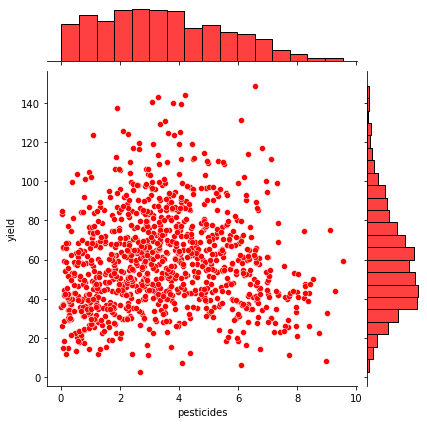

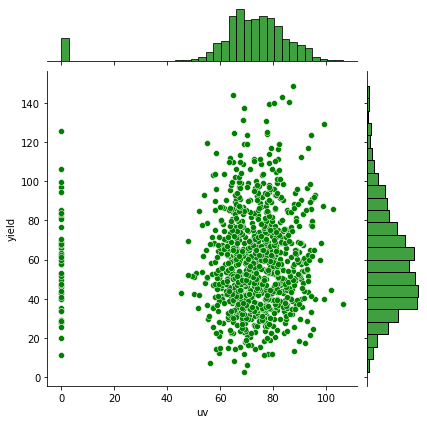

In [310]:
sns.jointplot(x='water',y='yield',data=data, color='b')
sns.jointplot(x='fertilizer_usage', y='yield',data=data, color='y')
sns.jointplot(x='pesticides', y='yield',data=data, color='r')
sns.jointplot(x='uv', y='yield',data=data, color='g')

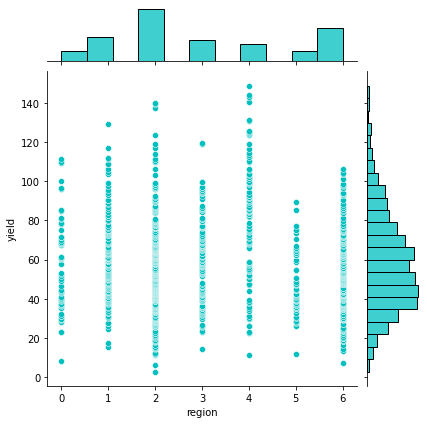

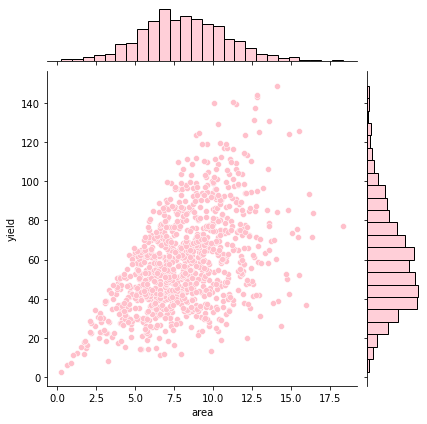

In [311]:
sns.jointplot(x='region', y='yield',data=data, color='c')
sns.jointplot(x='area', y='yield',data=data, color='pink')

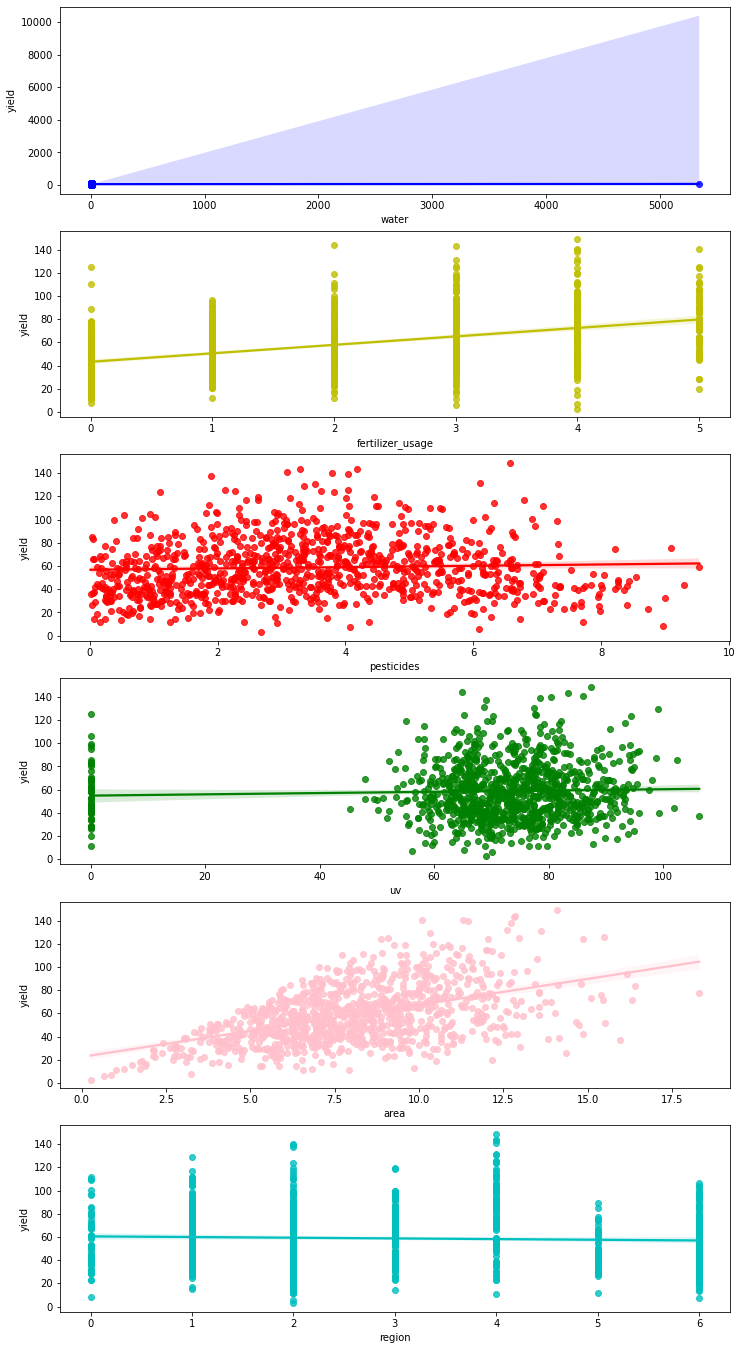

In [312]:
f, ax = plt.subplots(6, figsize=(12,24))
sns.regplot(x="water", y="yield", data=data, color='b', ax=ax[0]);
sns.regplot(x="fertilizer_usage", y="yield", data=data, color='y', ax=ax[1]);
sns.regplot(x="pesticides", y="yield", data=data, color='r', ax=ax[2]);
sns.regplot(x="uv", y="yield", data=data, color='g', ax=ax[3]);
sns.regplot(x="area", y="yield", data=data, color='pink', ax=ax[4]);
sns.regplot(x="region", y="yield", data=data, color='c', ax=ax[5]);

In [313]:
corr=data.corr()
corr.style.background_gradient(cmap="inferno")

,water,uv,area,fertilizer_usage,yield,pesticides,region
water,1.000000,0.035519,0.000132,0.003419,0.014446,-0.008056,-0.050885
uv,0.035519,1.000000,0.063638,-0.020593,0.042384,-0.002886,0.003181
area,0.000132,0.063638,1.000000,-0.202512,0.491220,0.036302,0.369481
fertilizer_usage,0.003419,-0.020593,-0.202512,1.000000,0.452183,-0.056462,0.022406
yield,0.014446,0.042384,0.491220,0.452183,1.000000,0.048380,-0.045051
pesticides,-0.008056,-0.002886,0.036302,-0.056462,0.048380,1.000000,-0.010899
region,-0.050885,0.003181,0.369481,0.022406,-0.045051,-0.010899,1.000000


##### Spliting Data to Training and Testing.

In [314]:
np.random.seed(0)
data_train, data_test = train_test_split(
    data, train_size = 0.7, 
    test_size = 0.3, 
    random_state = 100
)

In [315]:
data_train.head()

,water,uv,area,fertilizer_usage,yield,pesticides,region
420,2.503,70.783,7.308,2,64.891,3.849,2
278,6.735,99.227,8.105,1,39.838,1.434,2
218,8.067,71.206,3.523,1,20.605,0.529,2
363,6.040,71.725,10.049,1,53.753,6.930,2
850,9.555,66.702,6.236,2,37.121,6.150,6


In [316]:
data.describe()

,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,11.710157,70.185656,8.098848,2.12300,58.758571,3.452301,3.039000
std,168.691836,18.922905,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.000000,0.000000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,4.262000,65.744500,6.297000,1.00000,40.698000,1.804500,2.000000
50%,6.348000,72.868000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,8.611000,80.220250,9.900250,3.00000,73.645500,4.916000,5.000000
max,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


dividing training data to x and y

In [317]:
y_train = data_train.pop('yield')
X_train = data_train

In [318]:
y_train.head()

420    64.891
278    39.838
218    20.605
363    53.753
850    37.121
Name: yield, dtype: float64

In [319]:
X_train.head()

,water,uv,area,fertilizer_usage,pesticides,region
420,2.503,70.783,7.308,2,3.849,2
278,6.735,99.227,8.105,1,1.434,2
218,8.067,71.206,3.523,1,0.529,2
363,6.040,71.725,10.049,1,6.930,2
850,9.555,66.702,6.236,2,6.150,6


In [320]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)